In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ML Algorithms

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
train_split_df = pd.read_csv('../input/titanic/train.csv')
test_split_df = pd.read_csv('../input/titanic/test.csv')

# Data Visual Analysis

In [3]:
train_split_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_split_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_split_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_split_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_split_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Relation between potential features and the Final outcome

In [8]:
def check_relation_to_survival(column_name, pred_column_name='Survived', data = train_split_df):
    return train_split_df[[column_name, pred_column_name]].groupby(
        [column_name], as_index=False
    ).mean().sort_values(
        by=pred_column_name, ascending=False)

In [9]:
check_relation_to_survival('Pclass')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
check_relation_to_survival('Sex')

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
check_relation_to_survival('Cabin')

,Cabin,Survived
73,C62 C64,1.0
97,D21,1.0
94,D17,1.0
95,D19,1.0
60,C148,1.0
...,...,...
67,C46,0.0
64,C30,0.0
59,C128,0.0
56,C124,0.0


In [12]:
check_relation_to_survival('Parch').sort_values(by='Parch')

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [13]:
check_relation_to_survival('SibSp').sort_values(by='SibSp')

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
check_relation_to_survival('Embarked')

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


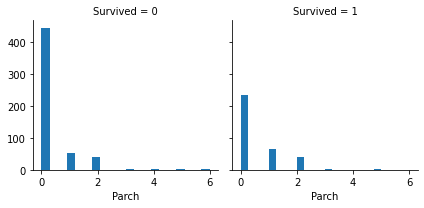

In [15]:
bar_graph = sns.FacetGrid(train_split_df, col='Survived')
bar_graph.map(plt.hist, 'Parch', bins=20)

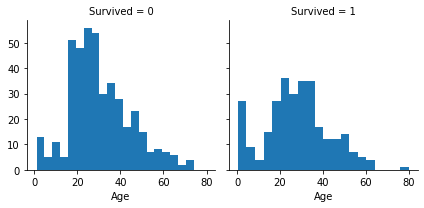

In [16]:
bar_graph = sns.FacetGrid(train_split_df, col='Survived')
bar_graph.map(plt.hist, 'Age', bins=20)

In [17]:
# Droping due to lack of data points
train_split_df = train_split_df.drop(['Ticket', 'Cabin'], axis=1)
test_split_df = test_split_df.drop(['Ticket', 'Cabin'], axis=1)

# Data Preperation
Includes feature analysis, feature reduction and generation

In [18]:
train_split_df['Title'] = train_split_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_split_df['Title'] = test_split_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_split_df['Title'], test_split_df['Sex'])

Sex,female,male
Title,,
Don,0,1
Dr,0,3
Master,9,14
Miss,37,64
Mme,0,1
Mr,83,145
Mrs,21,37
Rev,2,1


In [19]:
train_split_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [20]:
for dataset in [train_split_df, test_split_df]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_split_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in [train_split_df, test_split_df]:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_split_df.head()

In [21]:
train_split_df = train_split_df.drop(['Name', 'PassengerId'], axis=1)
test_split_df = test_split_df.drop(['Name'], axis=1)
train_split_df.shape, test_split_df.shape

((891, 9), (418, 9))

In [22]:
for dataset in [train_split_df, test_split_df]:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [23]:
train_split_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,Mr
1,1,1,1,38.0,1,0,71.2833,C,Mrs
2,1,3,1,26.0,0,0,7.9250,S,Miss
3,1,1,1,35.0,1,0,53.1000,S,Mrs
4,0,3,0,35.0,0,0,8.0500,S,Mr


In [24]:
train_split_df['Age'].fillna((train_split_df['Age'].mean()), inplace=True)
test_split_df['Age'].fillna((test_split_df['Age'].mean()), inplace=True)

In [25]:
train_split_df = train_split_df.drop(['Parch', 'SibSp'], axis=1)
test_split_df = test_split_df.drop(['Parch', 'SibSp'], axis=1)

In [26]:
train_split_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,0,22.000000,7.2500,S,Mr
1,1,1,1,38.000000,71.2833,C,Mrs
2,1,3,1,26.000000,7.9250,S,Miss
3,1,1,1,35.000000,53.1000,S,Mrs
4,0,3,0,35.000000,8.0500,S,Mr
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,13.0000,S,Other
887,1,1,1,19.000000,30.0000,S,Miss
888,0,3,1,29.699118,23.4500,S,Miss
889,1,1,0,26.000000,30.0000,C,Mr


In [27]:
test_split_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title
0,892,3,0,34.5,7.8292,Q,Mr
1,893,3,1,47.0,7.0000,S,Mrs
2,894,2,0,62.0,9.6875,Q,Mr
3,895,3,0,27.0,8.6625,S,Mr
4,896,3,1,22.0,12.2875,S,Mrs


## One-hot encoding for categorical features

In [28]:
# Function for one-hot
def convert_one_hot(input_df, column_name):
    one_hot = pd.get_dummies(input_df[column_name], prefix=column_name)
    input_df = input_df.drop(column_name,axis = 1)
    return input_df.join(one_hot)    

In [29]:
# One hot for Pclass
train_split_df = convert_one_hot(train_split_df, "Pclass")
test_split_df = convert_one_hot(test_split_df, "Pclass")

In [30]:
train_split_df

,Survived,Sex,Age,Fare,Embarked,Title,Pclass_1,Pclass_2,Pclass_3
0,0,0,22.000000,7.2500,S,Mr,0,0,1
1,1,1,38.000000,71.2833,C,Mrs,1,0,0
2,1,1,26.000000,7.9250,S,Miss,0,0,1
3,1,1,35.000000,53.1000,S,Mrs,1,0,0
4,0,0,35.000000,8.0500,S,Mr,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,0,27.000000,13.0000,S,Other,0,1,0
887,1,1,19.000000,30.0000,S,Miss,1,0,0
888,0,1,29.699118,23.4500,S,Miss,0,0,1
889,1,0,26.000000,30.0000,C,Mr,1,0,0


In [31]:
# One hot for Title
train_split_df = convert_one_hot(train_split_df, "Title")
test_split_df = convert_one_hot(test_split_df, "Title")

In [32]:
train_split_df

,Survived,Sex,Age,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,0,22.000000,7.2500,S,0,0,1,0,0,1,0,0
1,1,1,38.000000,71.2833,C,1,0,0,0,0,0,1,0
2,1,1,26.000000,7.9250,S,0,0,1,0,1,0,0,0
3,1,1,35.000000,53.1000,S,1,0,0,0,0,0,1,0
4,0,0,35.000000,8.0500,S,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.000000,13.0000,S,0,1,0,0,0,0,0,1
887,1,1,19.000000,30.0000,S,1,0,0,0,1,0,0,0
888,0,1,29.699118,23.4500,S,0,0,1,0,1,0,0,0
889,1,0,26.000000,30.0000,C,1,0,0,0,0,1,0,0


In [33]:
# One hot for Title
train_split_df = convert_one_hot(train_split_df, "Embarked")
test_split_df = convert_one_hot(test_split_df, "Embarked")

In [34]:
train_split_df

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Embarked_C,Embarked_Q,Embarked_S
0,0,0,22.000000,7.2500,0,0,1,0,0,1,0,0,0,0,1
1,1,1,38.000000,71.2833,1,0,0,0,0,0,1,0,1,0,0
2,1,1,26.000000,7.9250,0,0,1,0,1,0,0,0,0,0,1
3,1,1,35.000000,53.1000,1,0,0,0,0,0,1,0,0,0,1
4,0,0,35.000000,8.0500,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.000000,13.0000,0,1,0,0,0,0,0,1,0,0,1
887,1,1,19.000000,30.0000,1,0,0,0,1,0,0,0,0,0,1
888,0,1,29.699118,23.4500,0,0,1,0,1,0,0,0,0,0,1
889,1,0,26.000000,30.0000,1,0,0,0,0,1,0,0,1,0,0


In [35]:
test_split_df

,PassengerId,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Embarked_C,Embarked_Q,Embarked_S
0,892,0,34.50000,7.8292,0,0,1,0,0,1,0,0,0,1,0
1,893,1,47.00000,7.0000,0,0,1,0,0,0,1,0,0,0,1
2,894,0,62.00000,9.6875,0,1,0,0,0,1,0,0,0,1,0
3,895,0,27.00000,8.6625,0,0,1,0,0,1,0,0,0,0,1
4,896,1,22.00000,12.2875,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,30.27259,8.0500,0,0,1,0,0,1,0,0,0,0,1
414,1306,1,39.00000,108.9000,1,0,0,0,0,0,0,1,1,0,0
415,1307,0,38.50000,7.2500,0,0,1,0,0,1,0,0,0,0,1
416,1308,0,30.27259,8.0500,0,0,1,0,0,1,0,0,0,0,1


In [36]:
test_split_df['Fare'].fillna((test_split_df['Fare'].mean()), inplace=True)

## Test Split Informations

In [37]:
test_split_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Sex           418 non-null    int64  
 2   Age           418 non-null    float64
 3   Fare          418 non-null    float64
 4   Pclass_1      418 non-null    uint8  
 5   Pclass_2      418 non-null    uint8  
 6   Pclass_3      418 non-null    uint8  
 7   Title_Master  418 non-null    uint8  
 8   Title_Miss    418 non-null    uint8  
 9   Title_Mr      418 non-null    uint8  
 10  Title_Mrs     418 non-null    uint8  
 11  Title_Other   418 non-null    uint8  
 12  Embarked_C    418 non-null    uint8  
 13  Embarked_Q    418 non-null    uint8  
 14  Embarked_S    418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(11)
memory usage: 17.7 KB


# Model Training

## Split definition

In [38]:
validation_split = 0.1

In [39]:
validation_split = 0.1
valid_index = int(len(train_split_df)*validation_split)

In [40]:
# Train set
X_train = train_split_df[valid_index:].drop("Survived", axis=1)
Y_train = train_split_df[valid_index:]["Survived"]

# Validation set
X_valid = train_split_df[0:valid_index].drop("Survived", axis=1)
Y_valid = train_split_df[0:valid_index]["Survived"]

# Test set
X_test  = test_split_df.drop("PassengerId", axis=1).copy()

X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape, X_test.shape

((802, 14), (802,), (89, 14), (89,), (418, 14))

## Model 1: Random Forest

In [41]:
random_forest = RandomForestClassifier(n_estimators=4000, 
                                       max_depth=5,
                                       verbose=1)
random_forest.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    5.9s finished


RandomForestClassifier(max_depth=5, n_estimators=4000, verbose=1)

In [42]:
print("Train Accuracy : ",round(random_forest.score(X_train, Y_train) *100, 2))
print("Valid Accuracy : ", round(random_forest.score(X_valid, Y_valid) * 100, 2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train Accuracy :  85.66
Valid Accuracy :  82.02


[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    0.4s finished


In [43]:
Y_pred_0 = random_forest.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    0.5s finished


## Model 2: Decision Tree

In [44]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [45]:
print("Train Accuracy : ",round(decision_tree.score(X_train, Y_train) *100, 2))
print("Valid Accuracy : ", round(decision_tree.score(X_valid, Y_valid) * 100, 2))

Train Accuracy :  83.92
Valid Accuracy :  82.02


In [46]:
Y_pred_1 = decision_tree.predict(X_test)

## Model 3: XGBClassifier

In [47]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, n_estimators=400, n_jobs=5, num_parallel_tree=2,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [48]:
xgb.fit(X_train, Y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:30:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=5, num_parallel_tree=2, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [49]:
print("Train Accuracy : ",round(xgb.score(X_train, Y_train) *100, 2))
print("Valid Accuracy : ", round(xgb.score(X_valid, Y_valid) * 100, 2))

Train Accuracy :  90.27
Valid Accuracy :  84.27


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [50]:
Y_pred_2 = xgb.predict(X_test)

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


# Final Submission

In [51]:
#Y_pred = np.round(np.mean([Y_pred_0, Y_pred_1, Y_pred_2], axis=0),0).astype(int)
Y_pred = np.mean([Y_pred_0, Y_pred_1, Y_pred_2], axis=0).astype(int)

In [52]:
submission = pd.DataFrame({
        "PassengerId": test_split_df["PassengerId"],
        "Survived": Y_pred
})

In [53]:
submission.to_csv('./submission.csv', index=False)

# References
* https://www.kaggle.com/alexisbcook/titanic-tutorial
* https://www.youtube.com/watch?v=8yZMXCaFshs